In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
pd.options.display.max_columns = 14
train = pd.read_csv('train_2013.csv')
test = pd.read_csv('test_2014.csv')
submission = pd.read_csv('sampleSubmission.csv')
# Any results you write to the current directory are saved as output.

In [2]:
pd.options.display.max_columns = 20
train.tail()

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected
1126689,1126930,58.0 53.0 49.0 45.0 40.0 36.0 31.0 27.0 23.0 1...,60.0 60.0 60.0 60.0 60.0 60.0 60.0 60.0 60.0 6...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.0562735 0.0400594 0.0167946 0.035638 0.01666...,16.5 14.5 16.0 18.5 14.5 16.0 6.5 14.5 28.0 20...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.558333 0.708333 0.208333 0.811667 0.581667 0...,4.0 -1.0 3.5 4.0 5.0 9.0 7.0 21.0 3.5 5.5 3.0 ...,0.0625 1.125 2.8125 0.625 -1.4375 4.4375 0.625...,nan nan nan nan nan nan nan nan nan nan nan na...,nan nan nan nan nan nan nan nan nan nan nan na...,nan nan nan nan nan nan nan nan nan nan nan na...,0.0
1126690,1126931,20.0,90.0,-99900.0,-99900.0,8.0,0.0,0.0,-99900.0,-99900.0,999.0,-3.0,-99900.0,0.891667,4.0,4.9375,NaN,NaN,NaN,0.0
1126691,1126932,57.0 53.0 50.0 46.0 42.0 39.0 35.0 31.0 27.0 2...,13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 1...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,9.5 6.0 -1.0 3.0 -7.0 -2.5 1.5 10.0 0.0 11.5 5...,-99903.0 -99903.0 -99903.0 -99903.0 -99903.0 -...,0.851667 0.285 0.701667 0.975 0.485 0.845 0.97...,8.0 8.0 3.0 -6.0 8.5 -0.5 5.0 3.5 1.5 -5.0 0.0...,2.375 7.9375 2.5625 4.3125 5.9375 3.5625 2.625...,nan nan nan nan nan nan nan nan nan nan nan na...,nan nan nan nan nan nan nan nan nan nan nan na...,nan nan nan nan nan nan nan nan nan nan nan na...,0.0
1126692,1126933,56.0,4.0,-99900.0,-99900.0,8.0,0.0,0.0,-99900.0,-99900.0,999.0,-2.0,-99900.0,1.02833,-99900.0,1.9375,NaN,NaN,NaN,0.0
1126693,1126934,21.0,36.0,-99900.0,16.0,8.0,0.0,0.0,-99900.0,-99900.0,0.326939,10.5,-99900.0,0.911667,3.0,-1.4375,NaN,NaN,NaN,0.0


In [3]:
test.head()

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD
0,1,58.0 55.0 52.0 49.0 41.0 39.0 30.0 25.0 17.0 1...,58.0 58.0 58.0 58.0 58.0 58.0 58.0 58.0 58.0 5...,13.5 12.5 21.5 17.5 13.0 -99900.0 13.0 -99900....,-99900.0 -99900.0 12.0 -99900.0 15.5 -99900.0 ...,8.0 9.0 9.0 9.0 8.0 8.0 8.0 8.0 8.0 9.0 9.0 9....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,999.0 0.935734 0.0 0.911172 0.945892 999.0 0.9...,13.5 12.5 21.5 17.5 13.0 11.5 13.0 13.0 12.0 1...,13.5 12.5 21.5 17.5 13.0 -99900.0 13.0 -99900....,1.05167 1.05167 1.01833 0.981667 1.05167 0.938...,-99900.0 -99900.0 -99901.0 -99901.0 -99900.0 -...,-0.6875 -0.875 1.4375 -1.5625 -1.1875 -0.1875 ...,-12.4554135801 -12.6138851372 -12.1058825364 -...,1.36284743469 1.34261307456 2.08219892477 1.15...,0.530589608244 0.518934088749 0.821164352199 0...
1,2,54.0,81.0,-99900.0,-99900.0,8.0,0.0,0.0,-99900.0,-99900.0,999.0,6.0,-99900.0,1.05167,-99900.0,5.0,NaN,NaN,NaN
2,3,48.0,24.0,-99900.0,-99900.0,8.0,0.0,0.0,-99900.0,-99900.0,999.0,20.0,-99900.0,-99903.0,-99903.0,-99903.0,NaN,NaN,NaN
3,4,56.0 46.0 36.0 26.0 17.0 7.0,21.0 21.0 21.0 21.0 21.0 21.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.0778582 0.059251 0.0528011 0.044466 0.122422...,-8.5 -3.5 -6.0 -1.5 -0.5 -2.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.358333 0.648333 0.641667 0.651667 0.701667 0...,4.5 4.0 5.5 4.5 5.0 4.0,0.5 1.6875 2.125 3.5625 2.6875 4.5,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan
4,5,53.0 44.0 34.0 25.0 15.0 5.0,77.0 77.0 77.0 77.0 77.0 77.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.0 0.0 0.0 0.0 0.0 0.0,-1.5 2.5 -4.5 1.0 -1.0 0.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.608333 1.05167 0.775 0.585 0.435 0.791667,2.5 -99900.0 0.5 11.5 6.0 1.5,-2.5625 7.5 0.0 3.5 3.125 -1.375,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan


In [4]:
submission.head()

,Id,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,...,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
0,1,0.493069,0.725573,0.877855,0.951306,0.981517,0.993120,0.997458,0.999063,0.999655,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5,0.500000,0.731059,0.880797,0.952574,0.982014,0.993307,0.997527,0.999089,0.999665,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126694 entries, 0 to 1126693
Data columns (total 20 columns):
Id                   1126694 non-null int64
TimeToEnd            1126694 non-null object
DistanceToRadar      1126694 non-null object
Composite            1126694 non-null object
HybridScan           1126694 non-null object
HydrometeorType      1126694 non-null object
Kdp                  1126694 non-null object
RR1                  1126694 non-null object
RR2                  1126694 non-null object
RR3                  1126694 non-null object
RadarQualityIndex    1126694 non-null object
Reflectivity         1126694 non-null object
ReflectivityQC       1126694 non-null object
RhoHV                1126694 non-null object
Velocity             1126694 non-null object
Zdr                  1126694 non-null object
LogWaterVolume       975305 non-null object
MassWeightedMean     975305 non-null object
MassWeightedSD       975305 non-null object
Expected             1126694 non-nul

In [6]:
train.describe()

,Id,Expected
count,1.126694e+06,1.126694e+06
mean,5.634753e+05,4.238658e+00
std,3.253159e+05,7.542596e+01
min,1.000000e+00,0.000000e+00
25%,2.817512e+05,0.000000e+00
50%,5.634785e+05,0.000000e+00
75%,8.452108e+05,0.000000e+00
max,1.126934e+06,2.451940e+04


In [7]:
train.shape

(1126694, 20)

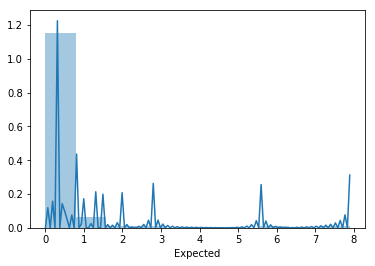

In [8]:
sns.distplot(train['Expected'].head(100))

In [9]:
train['Expected'].value_counts().sort_values(ascending=False)

0.0       987398
0.3        35357
0.5        17420
0.8        10784
1.0        10119
1.3         6816
1.5         5561
1.8         4765
2.0         4354
2.3         3209
2.5         3107
2.8         2509
3.0         2357
3.3         1819
3.6         1804
14.0        1375
3.8         1296
4.1         1270
4.3         1183
4.6          916
5.1          870
4.8          815
5.3          660
28.0         629
5.6          579
6.1          579
0.4          564
5.8          553
6.4          467
6.6          455
           ...  
83.5           1
94.2           1
101.6          1
1960.4         1
40.0           1
68.3           1
3999.7         1
89.7           1
211.8          1
4002.5         1
214.4          1
226.8          1
34.2           1
45.2           1
1269.7         1
1269.2         1
3965.2         1
209.6          1
137.9          1
4048.5         1
1304.3         1
77.7           1
66.3           1
87.9           1
82.8           1
77.2           1
3952.0         1
36.0          

In [10]:
print(train.shape)
sum(train['Expected']>69)

(1126694, 20)


5582

In [11]:
train.isnull().any()

Id                   False
TimeToEnd            False
DistanceToRadar      False
Composite            False
HybridScan           False
HydrometeorType      False
Kdp                  False
RR1                  False
RR2                  False
RR3                  False
RadarQualityIndex    False
Reflectivity         False
ReflectivityQC       False
RhoHV                False
Velocity             False
Zdr                  False
LogWaterVolume        True
MassWeightedMean      True
MassWeightedSD        True
Expected             False
dtype: bool

In [12]:
test.isnull().any()

Id                   False
TimeToEnd            False
DistanceToRadar      False
Composite            False
HybridScan           False
HydrometeorType      False
Kdp                  False
RR1                  False
RR2                  False
RR3                  False
RadarQualityIndex    False
Reflectivity         False
ReflectivityQC       False
RhoHV                False
Velocity             False
Zdr                  False
LogWaterVolume        True
MassWeightedMean      True
MassWeightedSD        True
dtype: bool

In [13]:
train.drop(train.index[train['Expected']>69],axis = 0, inplace = True)

In [14]:
train['Prediction'] = np.ceil(train['Expected'])
train['Prediction'] = train['Prediction'].astype(np.int8)

In [15]:
pd.options.display.max_columns = 100
train.head(n=4)

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected,Prediction
0,1,56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0,30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.006246 0.0200476 0.0113924 0.217157 0.028566...,13.0 17.5 14.0 8.5 7.0 11.0 9.0 9.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.865 0.841667 0.765 0.985 0.768333 0.491667 0...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,7.9375 4.5 4.1875 5.5625 3.375 7.0625 5.3125 6...,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,0.0,0
1,2,58.0 48.0 38.0 29.0 19.0 9.0,77.0 77.0 77.0 77.0 77.0 77.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,999.0 999.0 999.0 999.0 999.0 999.0,15.0 18.5 10.5 3.0 0.5 -3.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.635 0.851667 0.891667 0.638333 0.791667 0.73...,-4.0 -3.0 -2.0 -0.5 -4.0 3.0,2.6875 3.0 2.375 6.25 3.125 6.0625,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0
2,3,59.0 20.0,75.0 75.0,-99900.0 -99900.0,-99900.0 -99900.0,8.0 8.0,0.0 0.0,0.0 0.0,-99900.0 -99900.0,-99900.0 -99900.0,999.0 999.0,6.5 4.0,-99900.0 -99900.0,0.998333 0.891667,-99900.0 -3.5,-6.5 -4.6875,nan nan,nan nan,nan nan,0.0,0
3,4,53.0 43.0 34.0 24.0 14.0 5.0,21.0 21.0 21.0 21.0 21.0 21.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.0 0.0 0.0 0.0 0.0 0.0,11.0 14.0 12.0 11.0 13.0 15.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.688333 0.518333 0.708333 0.805 0.708333 0.555,-7.0 -12.0 -11.5 -8.5 -8.0 -13.0,-0.375 5.0625 1.1875 2.0 2.0625 0.3125,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0


In [16]:
# train['TimeToEnd1'] = train['TimeToEnd'].apply(lambda x:' '.
#                                                join(list(map(lambda x: str(60.0-x),
#                                                              list(map(float, x.split()))))))

In [17]:
test['num_observation'] = test['TimeToEnd'].apply(lambda x:len(x.split()))

In [18]:
train['num_observation'] = train['TimeToEnd'].apply(lambda x:len(x.split()))
train.head(n=1)

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected,Prediction,num_observation
0,1,56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0,30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.006246 0.0200476 0.0113924 0.217157 0.028566...,13.0 17.5 14.0 8.5 7.0 11.0 9.0 9.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.865 0.841667 0.765 0.985 0.768333 0.491667 0...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,7.9375 4.5 4.1875 5.5625 3.375 7.0625 5.3125 6...,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,0.0,0,8


#### Feature Engineering on features RR1, RR2, RR3

In [19]:
train['RR1'] = train['RR1'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [20]:
train['RR2'] = train['RR2'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [21]:
train['RR3'] = train['RR3'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [22]:
test['RR1'] = test['RR1'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [23]:
test['RR2'] = test['RR2'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [24]:
test['RR3'] = test['RR3'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x <0 else x, 
                                                             list(map(float, x.split()))))))))

In [25]:
train['RR1_mean'] = train['RR1'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [26]:
train['RR2_mean'] = train['RR2'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [27]:
train['RR3_mean'] = train['RR3'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [28]:
test['RR1_mean'] = test['RR1'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [29]:
test['RR2_mean'] = test['RR2'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [30]:
test['RR3_mean'] = test['RR3'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [31]:
train['RR_mean'] = train['RR1_mean']+train['RR2_mean']+train['RR3_mean']
test['RR_mean'] = test['RR1_mean'] + test['RR2_mean'] + test['RR3_mean']

In [32]:
train.drop(train.index[train['RR_mean']>300], inplace = True)

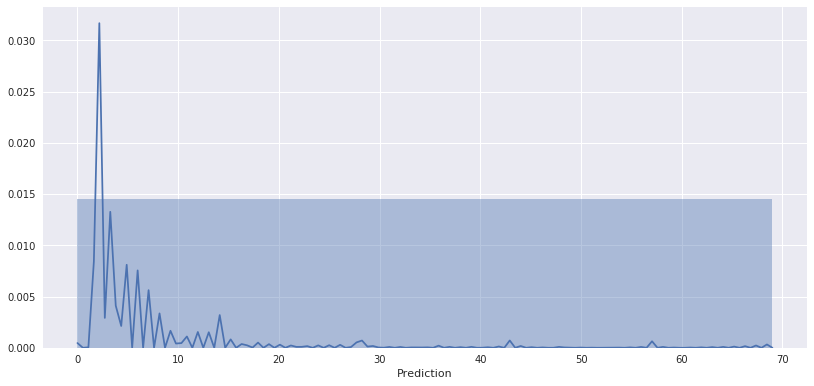

In [33]:
sns.set(rc={'figure.figsize':(13.7,6.27)})
# sns.barplot(x = train['Prediction'], y = train['RR1_mean'])
sns.distplot(train['Prediction'],bins = 1,hist = True)

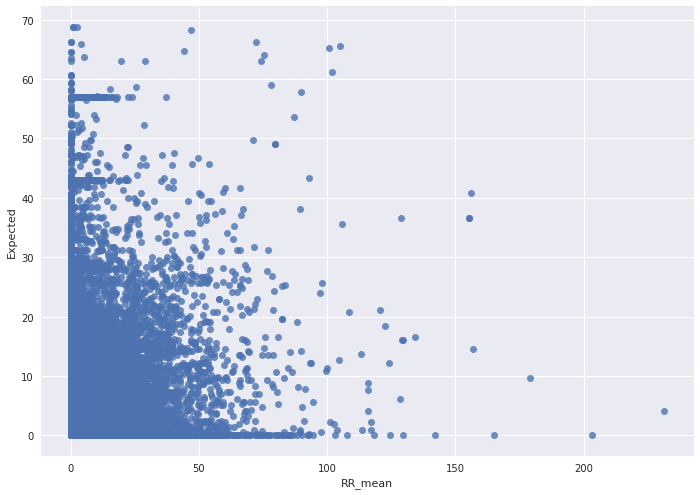

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x = train['RR_mean'], y = train['Expected'], fit_reg = False)

#### RadarQualityIndex

In [35]:
test['RadarQualityIndex'] = test['RadarQualityIndex'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:1 if x >1.0 else 0.0 if x<0.0 else x, 
                                                             list(map(float, x.split()))))))))

In [36]:
train['RadarQualityIndex'] = train['RadarQualityIndex'].apply(lambda x:' '.join(list(map(str,list(map(lambda x:0 if x >1.0 else 0.0 if x<0.0 else x, 
                                                             list(map(float, x.split()))))))))

In [37]:
train['RadarQualityIndex_mean'] = train['RadarQualityIndex'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [38]:
test['RadarQualityIndex_mean'] = test['RadarQualityIndex'].apply(lambda x:np.mean(list(map(float, x.split()))))

In [39]:
train.tail(n=40)

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected,Prediction,num_observation,RR1_mean,RR2_mean,RR3_mean,RR_mean,RadarQualityIndex_mean
1126654,1126895,2.0 22.0,51.0 61.0,-99900.0 -99900.0,-99900.0 -99900.0,8.0 8.0,0.0 0.0,0.0 0.0,0 0,0 0,0 0,8.5 20.5,-99900.0 -99900.0,0.975 1.04167,-99901.0 -99900.0,2.375 7.5625,nan nan,nan nan,nan nan,0.0,0,2,0.000000,0.000000,0.000000,0.000000,0.000000
1126655,1126896,50.0 44.0 39.0 33.0 27.0 21.0 15.0 10.0 4.0,16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0 0,0.00224989 0.00217514 0.0463133 0.00198625 0.0...,8.0 8.0 7.0 7.0 9.0 9.5 8.5 8.0 7.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.348333 0.575 0.711667 0.271667 0.658333 0.83...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,5.0625 7.9375 2.3125 7.9375 6.125 7.125 4.875 ...,nan nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan nan,0.0,0,9,0.000000,0.000000,0.000000,0.000000,0.024678
1126656,1126897,48.0,31.0,14.0,18.5,9.0,0.0,0.0,0,0,0.967984,14.0,14.0,1.05167,-99901.0,-0.125,-12.7942488887,1.54246387292,0.603402070988,0.0,0,1,0.000000,0.000000,0.000000,0.000000,0.967984
1126657,1126898,53.0 43.0 33.0 24.0 14.0 4.0,60.0 60.0 60.0 60.0 60.0 60.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0,0 0 0 0 0 0,0.0 0.0 0.0 0.0 0.0 0.0,1.5 -4.5 -2.5 0.0 1.0 4.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 0.945 1.05167 0.668333 1.05167 0.741667,-1.0 -4.5 -3.0 -2.0 -1.5 -1.0,-99900.0 2.75 7.9375 7.9375 2.75 6.5,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0,6,0.000000,0.000000,0.000000,0.000000,0.000000
1126658,1126899,21.0 11.0 2.0,28.0 28.0 28.0,-99900.0 12.5 10.0,-99900.0 11.0 -99900.0,8.0 8.0 8.0,0.0 0.0 0.0,0.0 0.0 0.0,0 0 0,0 0 0,0 0.938395 0.893853,10.0 12.5 10.0,-99900.0 12.5 10.0,0.635 1.05167 1.035,-13.0 -99901.0 -99901.0,2.875 -0.5 0.1875,nan -12.8158131794 -13.8753828919,nan 1.41262151376 1.61183918705,nan 0.550176616913 0.650123292174,0.0,0,3,0.000000,0.000000,0.000000,0.000000,0.610749
1126659,1126900,44.0 40.0 36.0 31.0 27.0 5.0 1.0 56.0 39.0 34....,55.0 55.0 55.0 55.0 55.0 55.0 55.0 94.0 94.0 9...,9.0 10.5 14.5 16.0 11.0 14.0 8.5 -99900.0 15.0...,14.5 17.5 12.5 11.0 -99900.0 14.0 8.5 14.0 15....,8.0 9.0 9.0 9.0 8.0 9.0 8.0 8.0 9.0 9.0 9.0 9....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,0.0 0.0 0.158981 0.0 0.0 0.0 0.0 0.0 0.0 0.347...,0 0 0.136336 0 0 0 0 0 0 0.393093 0 0 0,0 0 2.72927 0 0 0 0 0 0 0.000102738 0 0 0,0.656848 0.918669 0.98314 0.88074 0.840643 0.8...,9.0 9.5 14.5 10.0 4.0 10.0 6.5 14.0 15.0 18.0 ...,9.0 9.5 14.5 10.0 -99900.0 10.0 6.5 -99900.0 1...,1.05167 1.05167 1.015 1.05167 1.05167 1.03167 ...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,2.1875 0.125 -0.4375 -0.8125 -4.0 1.625 -0.375...,nan -13.8369246694 -12.4474396692 -13.13696610...,nan 1.61456064328 1.45425233942 1.31897052593 ...,nan 0.631919986593 0.562153205343 0.5290597651...,0.0,0,13,0.038934,0.040725,0.209952,0.289611,0.787041
1126660,1126901,52.0,95.0,-99900.0,-99900.0,8.0,0.0,0.0,0,0,0,6.0,-99900.0,0.485,-99900.0,5.0625,NaN,NaN,NaN,0.0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1126661,1126902,59.0 47.0,45.0 45.0,-99900.0 -99900.0,-99900.0 17.5,8.0 8.0,0.0 0.0,0.0 0.0,0 0,0 0,0.25083 0,12.0 19.5,-99900.0 -99900.0,1.05167 1.00833,7.0 16.0,-0.25 0.0,nan nan,nan nan,nan nan,0.0,0,2,0.000000,0.000000,0.000000,0.000000,0.125415
1126662,1126903,58.0 48.0 38.0 29.0 19.0 9.0,27.0 27.0 27.0 27.0 27.0 27.0,-99900.0 -99

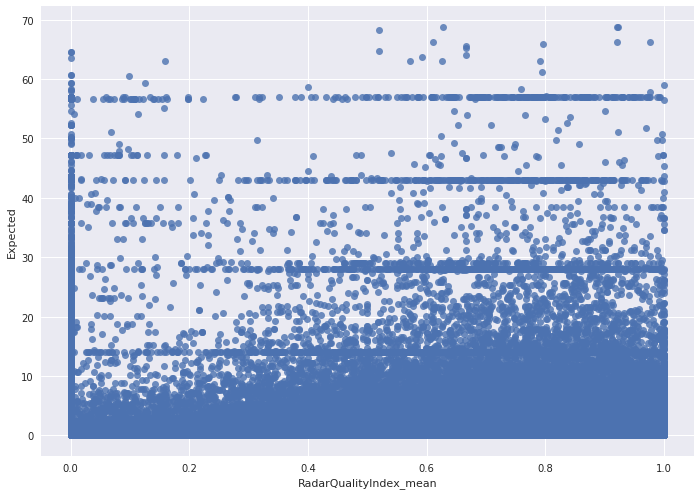

In [40]:
sns.regplot(x = train['RadarQualityIndex_mean'], y = train['Expected'], fit_reg = False)

In [41]:
train.head()

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected,Prediction,num_observation,RR1_mean,RR2_mean,RR3_mean,RR_mean,RadarQualityIndex_mean
0,1,56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0,30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0,0.006246 0.0200476 0.0113924 0.217157 0.028566...,13.0 17.5 14.0 8.5 7.0 11.0 9.0 9.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.865 0.841667 0.765 0.985 0.768333 0.491667 0...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,7.9375 4.5 4.1875 5.5625 3.375 7.0625 5.3125 6...,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,0.0,0,8,0.000000,0.000000,0.000000,0.00000,0.056994
1,2,58.0 48.0 38.0 29.0 19.0 9.0,77.0 77.0 77.0 77.0 77.0 77.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0,0 0 0 0 0 0,0 0 0 0 0 0,15.0 18.5 10.5 3.0 0.5 -3.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.635 0.851667 0.891667 0.638333 0.791667 0.73...,-4.0 -3.0 -2.0 -0.5 -4.0 3.0,2.6875 3.0 2.375 6.25 3.125 6.0625,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0,6,0.000000,0.000000,0.000000,0.00000,0.000000
2,3,59.0 20.0,75.0 75.0,-99900.0 -99900.0,-99900.0 -99900.0,8.0 8.0,0.0 0.0,0.0 0.0,0 0,0 0,0 0,6.5 4.0,-99900.0 -99900.0,0.998333 0.891667,-99900.0 -3.5,-6.5 -4.6875,nan nan,nan nan,nan nan,0.0,0,2,0.000000,0.000000,0.000000,0.00000,0.000000
3,4,53.0 43.0 34.0 24.0 14.0 5.0,21.0 21.0 21.0 21.0 21.0 21.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0,0 0 0 0 0 0,0.0 0.0 0.0 0.0 0.0 0.0,11.0 14.0 12.0 11.0 13.0 15.5,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,0.688333 0.518333 0.708333 0.805 0.708333 0.555,-7.0 -12.0 -11.5 -8.5 -8.0 -13.0,-0.375 5.0625 1.1875 2.0 2.0625 0.3125,nan nan nan nan nan nan,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0,6,0.000000,0.000000,0.000000,0.00000,0.000000
4,5,56.0 52.0 43.0 59.0 54.0 48.0 42.0 36.0 31.0 5...,69.0 69.0 69.0 83.0 83.0 83.0 83.0 83.0 83.0 5...,23.0 24.0 22.0 15.5 14.5 16.0 15.0 18.5 12.5 1...,13.5 15.5 19.0 -99900.0 -99900.0 -99900.0 -999...,9.0 9.0 9.0 8.0 8.0 8.0 8.0 9.0 9.0 9.0 9.0 9....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.27899 0....,0 0 0 0 0 0 0 0 0 0.42133 0 0.5145 0.518951 0 ...,0 0 0 0 0 0 0 0 0 7.53835 0 0 0 0 0 0 0 0 0 0 ...,1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.996433 0...,14.0 14.0 17.0 24.5 23.5 21.5 25.0 16.0 21.0 1...,14.0 14.0 17.0 -99900.0 -99900.0 -99900.0 -999...,1.01833 1.01167 0.991667 1.015 1.015 1.005 1.0...,14.0 13.5 12.5 -13.5 -19.5 -16.0 -15.0 -14.0 -...,0.9375 -0.875 -0.75 0.0 0.0625 0.3125 0.5625 -...,-13.4793885769 -12.1370512402 -11.6001776071 n...,1.86413642918 1.27740873124 1.35497004174 nan ...,0.755068594278 0.502681241559 0.514253049727 n...,0.0,0,33,0.117661,0.044084,0.228435,0.39018,0.482474


In [42]:
# plt.scatter(x = train['RR3_mean'], y = train['Expected'])
# plt.show()

In [43]:
# corrmat = train[['Expected','RR1_mean', 'RR2_mean','RR3_mean']].corr()
# display(corrmat)
# corrmat.sort_values("Expected",inplace = True, ascending = False)
# sns.heatmap(corrmat, vmax=.8, square=True)

#### LogWaterVolume

In [44]:
train['LogWaterVolume'] = train['LogWaterVolume'].apply(lambda x:str(x))
train['LogWaterVolume'] = train['LogWaterVolume'].apply(lambda x:' '.join(list(map(str, list
                                                                          (map(lambda x:
                                                                               -100000 if np.isnan(x) else x,
                                                                              list(map(float, x.split()))))))))

In [45]:
test['LogWaterVolume'] = test['LogWaterVolume'].apply(lambda x:str(x))
test['LogWaterVolume'] = test['LogWaterVolume'].apply(lambda x:' '.join(list(map(str, list
                                                                          (map(lambda x:
                                                                               -100000 if np.isnan(x) else x,
                                                                              list(map(float, x.split()))))))))

In [46]:
train['LogWaterVolume_mean'] = train['LogWaterVolume'].apply(lambda x:np.exp(np.mean(list(map(float,
                                                                                              x.split())))))

In [47]:
test['LogWaterVolume_mean'] = test['LogWaterVolume'].apply(lambda x:np.exp(np.mean(list(map(float, 
                                                                                            x.split())))))

#### ReflectivityQC

In [48]:
train['ReflectivityQC'] = train['ReflectivityQC'].apply(
    lambda x: ' '.join(map(str, list(map(lambda x:0 if x<0 else x, list(map(float, x.split())))))))

In [49]:
test['ReflectivityQC'] = test['ReflectivityQC'].apply(
    lambda x: ' '.join(map(str, list(map(lambda x:0 if x<0 else x, list(map(float, x.split())))))))

In [50]:
train['ReflectivityQC_mean'] = train['ReflectivityQC'].apply(lambda x: np.mean(list(map(float, x.split()))))

In [51]:
test['ReflectivityQC_mean'] = test['ReflectivityQC'].apply(lambda x: np.mean(list(map(float, x.split()))))

In [52]:
train.head(n = 2)

,Id,TimeToEnd,DistanceToRadar,Composite,HybridScan,HydrometeorType,Kdp,RR1,RR2,RR3,RadarQualityIndex,Reflectivity,ReflectivityQC,RhoHV,Velocity,Zdr,LogWaterVolume,MassWeightedMean,MassWeightedSD,Expected,Prediction,num_observation,RR1_mean,RR2_mean,RR3_mean,RR_mean,RadarQualityIndex_mean,LogWaterVolume_mean,ReflectivityQC_mean
0,1,56.0 37.0 31.0 25.0 19.0 13.0 7.0 2.0,30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0 0 0,0 0 0 0 0 0 0 0,0.006246 0.0200476 0.0113924 0.217157 0.028566...,13.0 17.5 14.0 8.5 7.0 11.0 9.0 9.0,0 0 0 0 0 0 0 0,0.865 0.841667 0.765 0.985 0.768333 0.491667 0...,-99901.0 -99901.0 -99901.0 -99901.0 -99901.0 -...,7.9375 4.5 4.1875 5.5625 3.375 7.0625 5.3125 6...,-100000 -100000 -100000 -100000 -100000 -10000...,nan nan nan nan nan nan nan nan,nan nan nan nan nan nan nan nan,0.0,0,8,0.0,0.0,0.0,0.0,0.056994,0.0,0.0
1,2,58.0 48.0 38.0 29.0 19.0 9.0,77.0 77.0 77.0 77.0 77.0 77.0,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,-99900.0 -99900.0 -99900.0 -99900.0 -99900.0 -...,8.0 8.0 8.0 8.0 8.0 8.0,0.0 0.0 0.0 0.0 0.0 0.0,0.0 0.0 0.0 0.0 0.0 0.0,0 0 0 0 0 0,0 0 0 0 0 0,0 0 0 0 0 0,15.0 18.5 10.5 3.0 0.5 -3.0,0 0 0 0 0 0,0.635 0.851667 0.891667 0.638333 0.791667 0.73...,-4.0 -3.0 -2.0 -0.5 -4.0 3.0,2.6875 3.0 2.375 6.25 3.125 6.0625,-100000 -100000 -100000 -100000 -100000 -100000,nan nan nan nan nan nan,nan nan nan nan nan nan,0.0,0,6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


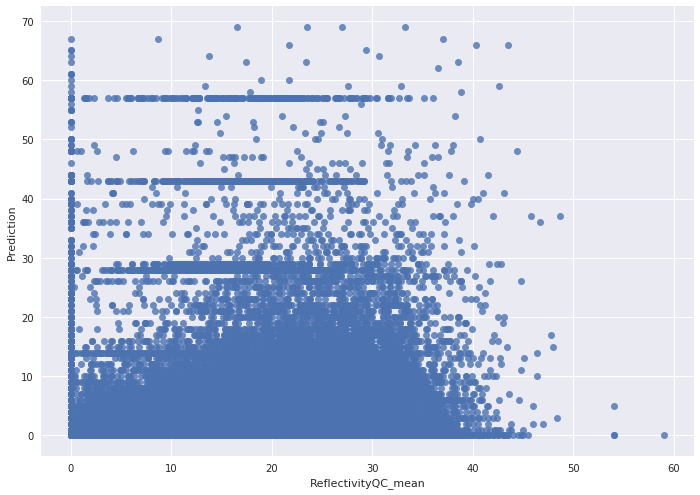

In [53]:
sns.regplot( x = train['ReflectivityQC_mean'], y = train['Prediction'], fit_reg = False)

#### Removing Outliers

In [54]:
# Removing Outlier in Logwater_mean
train.drop(train.index[train['LogWaterVolume_mean']>0.0075], inplace =True)

In [55]:
train['LogWaterVolume_mean'].value_counts()

0.000000e+00    1081231
9.788135e-07         35
7.264895e-07         31
9.418848e-07         30
1.198357e-06         29
1.299869e-06         29
8.175407e-07         29
6.843190e-07         28
5.161168e-07         27
5.825364e-07         27
2.758016e-06         25
2.146298e-06         25
1.210380e-06         24
4.498752e-07         24
1.308902e-06         24
1.171766e-06         23
1.640566e-06         23
7.846749e-07         22
3.844792e-06         22
3.561261e-06         21
9.252720e-07         21
8.264902e-07         21
2.030234e-06         20
4.085281e-07         20
7.636151e-07         20
2.423092e-06         20
4.116570e-06         20
2.674971e-06         20
1.899398e-06         20
1.002091e-06         19
                 ...   
8.438829e-07          1
7.267793e-06          1
9.862263e-06          1
8.588737e-06          1
9.410893e-06          1
3.298207e-05          1
7.743883e-07          1
2.267390e-05          1
2.662681e-06          1
3.336476e-05          1
4.336412e-06    

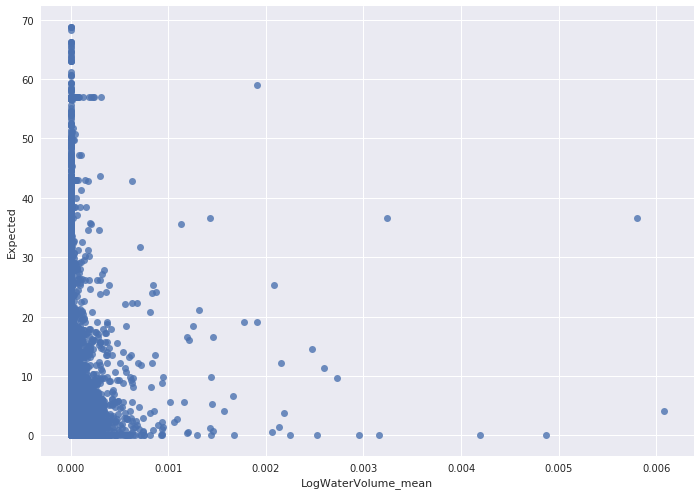

In [56]:
sns.regplot(x = train['LogWaterVolume_mean'], y = train['Expected'], fit_reg=False)

### Preparing Training and Test Data

In [57]:
X = train[['RR1_mean','RR2_mean','RR3_mean','RadarQualityIndex_mean','LogWaterVolume_mean', 'RR_mean'
           ,'ReflectivityQC_mean','num_observation']]
X.shape

(1121083, 8)

In [58]:
y = train['Prediction']
y.head(n=20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     6
8     0
9     0
10    2
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Prediction, dtype: int8

In [59]:
test.isnull().any()

Id                        False
TimeToEnd                 False
DistanceToRadar           False
Composite                 False
HybridScan                False
HydrometeorType           False
Kdp                       False
RR1                       False
RR2                       False
RR3                       False
RadarQualityIndex         False
Reflectivity              False
ReflectivityQC            False
RhoHV                     False
Velocity                  False
Zdr                       False
LogWaterVolume            False
MassWeightedMean           True
MassWeightedSD             True
num_observation           False
RR1_mean                  False
RR2_mean                  False
RR3_mean                  False
RR_mean                   False
RadarQualityIndex_mean    False
LogWaterVolume_mean       False
ReflectivityQC_mean       False
dtype: bool

In [60]:
train.isnull().any()

Id                        False
TimeToEnd                 False
DistanceToRadar           False
Composite                 False
HybridScan                False
HydrometeorType           False
Kdp                       False
RR1                       False
RR2                       False
RR3                       False
RadarQualityIndex         False
Reflectivity              False
ReflectivityQC            False
RhoHV                     False
Velocity                  False
Zdr                       False
LogWaterVolume            False
MassWeightedMean           True
MassWeightedSD             True
Expected                  False
Prediction                False
num_observation           False
RR1_mean                  False
RR2_mean                  False
RR3_mean                  False
RR_mean                   False
RadarQualityIndex_mean    False
LogWaterVolume_mean       False
ReflectivityQC_mean       False
dtype: bool

In [61]:
Test = test[['RR1_mean','RR2_mean','RR3_mean','RadarQualityIndex_mean','LogWaterVolume_mean', 'RR_mean'
           ,'ReflectivityQC_mean','num_observation']]
Test.head(n=2)

,RR1_mean,RR2_mean,RR3_mean,RadarQualityIndex_mean,LogWaterVolume_mean,RR_mean,ReflectivityQC_mean,num_observation
0,0.029185,0.030598,0.011673,0.838384,0.0,0.071456,12.404762,21
1,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1


### Training Model

In [62]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import ensemble
import xgboost as xgb
from sklearn.svm import SVC
xg = xgb.XGBClassifier()
xg.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [63]:
print(xg.score(X,y))

0.883677658122


In [64]:
output = xg.predict_proba(Test)
print(output.shape)
print(y.shape)
print(test.shape)

(630452, 69)
(1121083,)
(630452, 27)


In [65]:
output1 = (pd.DataFrame(output)).copy()
s= 'Predicted'
col = []
for i in range(0,69):
    col.append(s+str(i))
output1.columns = col
for i in range(1,69):
    output1[s+str(i)] += output1[s+str(i-1)]
display(output1.tail(n =1))
# print(output)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Predicted10,Predicted11,Predicted12,Predicted13,Predicted14,Predicted15,Predicted16,Predicted17,Predicted18,Predicted19,Predicted20,Predicted21,Predicted22,Predicted23,Predicted24,Predicted25,Predicted26,Predicted27,Predicted28,Predicted29,Predicted30,Predicted31,Predicted32,Predicted33,Predicted34,Predicted35,Predicted36,Predicted37,Predicted38,Predicted39,Predicted40,Predicted41,Predicted42,Predicted43,Predicted44,Predicted45,Predicted46,Predicted47,Predicted48,Predicted49,Predicted50,Predicted51,Predicted52,Predicted53,Predicted54,Predicted55,Predicted56,Predicted57,Predicted58,Predicted59,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68
630451,0.990308,0.996767,0.997323,0.99763,0.997847,0.998094,0.998281,0.998422,0.998509,0.998557,0.998599,0.998628,0.998659,0.99869,0.998794,0.998826,0.998852,0.998872,0.998893,0.998918,0.998932,0.998949,0.998964,0.99898,0.999102,0.99912,0.999139,0.999153,0.999186,0.999221,0.999234,0.99925,0.999263,0.999275,0.999299,0.999312,0.999358,0.999377,0.999392,0.99942,0.999438,0.999452,0.999464,0.999489,0.999507,0.999518,0.99953,0.999542,0.999656,0.999669,0.999681,0.999693,0.999705,0.999716,0.999728,0.99974,0.999752,0.99987,0.999882,0.999893,0.999905,0.999919,0.99993,0.999942,0.999954,0.999965,0.999977,0.999988,1.0


In [66]:
output1['Predicted69'] = output1['Predicted68']

In [67]:
output1['Predicted68'] = output1['Predicted67']

In [68]:
output1.tail(n=1)

,Predicted0,Predicted1,Predicted2,Predicted3,Predicted4,Predicted5,Predicted6,Predicted7,Predicted8,Predicted9,Predicted10,Predicted11,Predicted12,Predicted13,Predicted14,Predicted15,Predicted16,Predicted17,Predicted18,Predicted19,Predicted20,Predicted21,Predicted22,Predicted23,Predicted24,Predicted25,Predicted26,Predicted27,Predicted28,Predicted29,Predicted30,Predicted31,Predicted32,Predicted33,Predicted34,Predicted35,Predicted36,Predicted37,Predicted38,Predicted39,Predicted40,Predicted41,Predicted42,Predicted43,Predicted44,Predicted45,Predicted46,Predicted47,Predicted48,Predicted49,Predicted50,Predicted51,Predicted52,Predicted53,Predicted54,Predicted55,Predicted56,Predicted57,Predicted58,Predicted59,Predicted60,Predicted61,Predicted62,Predicted63,Predicted64,Predicted65,Predicted66,Predicted67,Predicted68,Predicted69
630451,0.990308,0.996767,0.997323,0.99763,0.997847,0.998094,0.998281,0.998422,0.998509,0.998557,0.998599,0.998628,0.998659,0.99869,0.998794,0.998826,0.998852,0.998872,0.998893,0.998918,0.998932,0.998949,0.998964,0.99898,0.999102,0.99912,0.999139,0.999153,0.999186,0.999221,0.999234,0.99925,0.999263,0.999275,0.999299,0.999312,0.999358,0.999377,0.999392,0.99942,0.999438,0.999452,0.999464,0.999489,0.999507,0.999518,0.99953,0.999542,0.999656,0.999669,0.999681,0.999693,0.999705,0.999716,0.999728,0.99974,0.999752,0.99987,0.999882,0.999893,0.999905,0.999919,0.99993,0.999942,0.999954,0.999965,0.999977,0.999988,0.999988,1.0


In [69]:
output1.insert(0, column='Id',value = submission['Id'])

In [70]:
print(output1.shape)
print(submission.shape)

(630452, 71)
(630452, 71)


In [71]:
output1['Predicted68'][output1['Predicted68']>1.0] = 1
output1['Predicted68'][output1['Predicted68']>1.0]

Series([], Name: Predicted68, dtype: float32)

In [72]:
output1['Predicted69'][output1['Predicted69']>1.0] = 1
output1['Predicted69'][output1['Predicted69']>1.0]

Series([], Name: Predicted69, dtype: float32)

In [73]:
output1.to_csv("prediction_xg.csv",index=False)

In [74]:
print(np.sort(y.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69]
